In [20]:
from typing import Callable
from matplotlib.pyplot import subplots
from numpy import linspace, array, copy, pi


def sense(x):
    return x


def simulate(dt, x, u, m=1, g=9.8):
    dx = array([x[3], x[4], x[5], 0, 0, -g])
    x += dt * dx
    if x[2] < 0:
        x[2] = 0
        x[5] = 0
    return x


def create_plot(title: str, x: array, plotter: Callable[[float], array], tf: float = 2 * pi, dt: float = 0.1):
    x_log = [copy(x)]
    time = linspace(0., tf, int(tf / dt) + 1)
    for t in time:
        x_log.append(copy(plotter(t)))
    x_log = array(x_log)
    fig, ax = subplots()
    ax.plot(time, x_log[:-1, 2])
    ax.set(title=title, xlabel="Time (t)", ylabel="Height (z)")
    ax.grid()

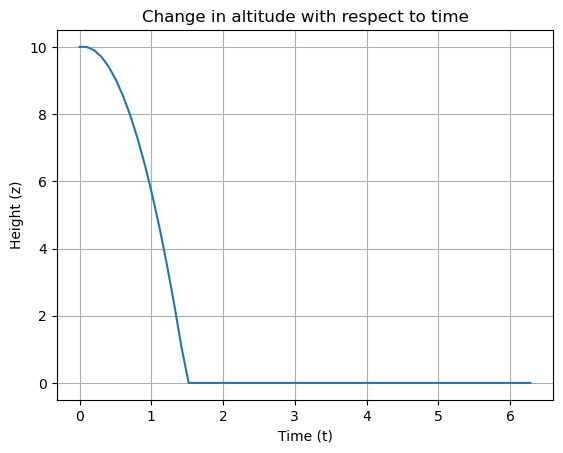

In [21]:
def control(t, y):
    return [0, 0, 0]


tf = 2 * pi
dt = 0.1
x = array([0., 0., 10., 0., 0., 0.])


def plotter(t):
    global x
    y = sense(x)
    u = control(t, y)
    x = simulate(dt, x, u)
    return x


create_plot("Change in altitude with respect to time", x, plotter, tf, dt)

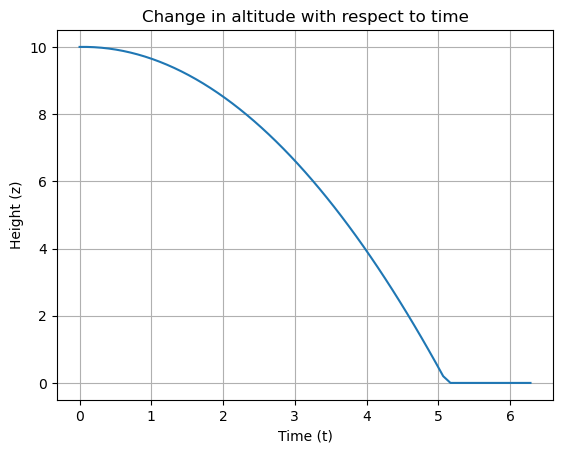

In [22]:
def simulate_with_buoyancy(dt, x, u, m=1, g=9.8, fb=9.0):
    fg = m * g
    net_force = fg - fb
    net_acceleration = net_force / m
    dx = array([x[3], x[4], x[5], 0, 0, -net_acceleration])
    x += dt * dx
    if x[2] < 0:
        x[2] = 0
        x[5] = 0
    return x


tf = 2 * pi
dt = 0.1
x = array([0., 0., 10., 0., 0., 0.])


def plotter_with_buoyancy(t):
    global x
    y = sense(x)
    u = control(t, y)
    x = simulate_with_buoyancy(dt, x, u)
    return x


create_plot("Change in altitude with respect to time", x, plotter_with_buoyancy, tf, dt)